# Hospital Management System Data Analysis and No-Show Prediction

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load all files
patients = pd.read_csv('hospital data for analysis/patients.csv')
doctors = pd.read_csv('hospital data for analysis/doctors.csv')
appointments = pd.read_csv('hospital data for analysis/appointments.csv')
treatments = pd.read_csv('hospital data for analysis/treatments.csv')
billing = pd.read_csv('hospital data for analysis/billing.csv')

# Loading Data

In [4]:
print(appointments.head(5))
print(billing.head(5))
print(doctors.head(5))
print(patients.head(5))
print(treatments.head(5))

  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  
  bill_id patient_id treatment_id   bill_date   amount payment_method  \
0    B001       P034         T001  2023-08-09  3941.97      Insurance   
1    B002       P032         T002  2023-06-09  4158.44      Insurance   
2    B003       P048         T003  2023-06-28  3731.55      Insurance   
3    B004       P025         T004  2023-09-01  4799.86      Insur

In [5]:
appointments.info()
billing.info()
doctors.info()
patients.info()
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount          200 non-null    float64
 5   payment_method  2

In [6]:
appointments.describe()
billing.describe()
doctors.describe()
patients.describe()
treatments.describe()

print(appointments.isnull().sum())
print(patients.isnull().sum())
print(billing.isnull().sum())
print(doctors.isnull().sum())
print(treatments.isnull().sum())

print("appointments columns:",appointments.columns.tolist())
print("patients columns:",patients.columns.tolist())
print("billing columns:",billing.columns.tolist())
print("doctors columns:",doctors.columns.tolist())
print("treatments columns:",treatments.columns.tolist())

appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64
patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64
bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64
doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience    0
hospital_branch     0
email               0
dtype: int64
treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64
appointments columns: ['appointment_id', 'patient_id', 'doctor_id', 'appointment_

In [7]:
merge_data = (
    appointments
    .merge(patients, on="patient_id")
    .merge(billing, on="patient_id")
    .merge(patients,on="patient_id")
    .merge(doctors,on="doctor_id")
    .merge(treatments,on="treatment_id")
)

print(merge_data.head(5))

  appointment_id_x patient_id doctor_id appointment_date appointment_time  \
0             A001       P034      D009       2023-08-09         15:15:00   
1             A001       P034      D009       2023-08-09         15:15:00   
2             A001       P034      D009       2023-08-09         15:15:00   
3             A002       P032      D004       2023-06-09         14:30:00   
4             A002       P032      D004       2023-06-09         14:30:00   

  reason_for_visit     status first_name_x last_name_x gender_x  ...  \
0          Therapy  Scheduled         Alex       Smith        F  ...   
1          Therapy  Scheduled         Alex       Smith        F  ...   
2          Therapy  Scheduled         Alex       Smith        F  ...   
3          Therapy    No-show         Alex       Moore        M  ...   
4          Therapy    No-show         Alex       Moore        M  ...   

  specialization  phone_number years_experience   hospital_branch  \
0     Pediatrics    7387087517     

# Feature Engineering

In [8]:
print(merge_data.isnull().sum())
print(merge_data.columns)
merge_data.fillna(0,inplace=True)
print(merge_data['status'].value_counts())

appointment_id_x        0
patient_id              0
doctor_id               0
appointment_date        0
appointment_time        0
reason_for_visit        0
status                  0
first_name_x            0
last_name_x             0
gender_x                0
date_of_birth_x         0
contact_number_x        0
address_x               0
registration_date_x     0
insurance_provider_x    0
insurance_number_x      0
email_x                 0
bill_id                 0
treatment_id            0
bill_date               0
amount                  0
payment_method          0
payment_status          0
first_name_y            0
last_name_y             0
gender_y                0
date_of_birth_y         0
contact_number_y        0
address_y               0
registration_date_y     0
insurance_provider_y    0
insurance_number_y      0
email_y                 0
first_name              0
last_name               0
specialization          0
phone_number            0
years_experience        0
hospital_bra

# Data Framing For Time

In [9]:
appointments['appointment_date'] = pd.to_datetime(appointments['appointment_date'])
treatments['treatment_date'] = pd.to_datetime(treatments['treatment_date'])
billing['bill_date'] = pd.to_datetime(billing['bill_date'])

merge_data["appointment_date"]=pd.to_datetime(merge_data["appointment_date"])
merge_data["year"]=merge_data["appointment_date"].dt.year
merge_data["month"]=merge_data["appointment_date"].dt.month
merge_data["day"]=merge_data["appointment_date"].dt.day
merge_data["days_of_week"]=merge_data["appointment_date"].dt.dayofweek
merge_data["hour"]=merge_data["appointment_date"].dt.hour
merge_data["is_weekend"]=merge_data["days_of_week"]>=5
merge_data["quarter"]=merge_data["appointment_date"].dt.quarter

print(merge_data[['appointment_date','year','day','days_of_week','hour','is_weekend','quarter']].head())

  appointment_date  year  day  days_of_week  hour  is_weekend  quarter
0       2023-08-09  2023    9             2     0       False        3
1       2023-08-09  2023    9             2     0       False        3
2       2023-08-09  2023    9             2     0       False        3
3       2023-06-09  2023    9             4     0       False        2
4       2023-06-09  2023    9             4     0       False        2


Seasonal Calculation-Analysis

In [10]:
def get_season(month):
    if month in[12,1,2]:
        return "winter"
    elif month in[3,4,5]:
        return "Summer"
    elif month in [6,7,8]:
        return "spring"
    else:
        return "Autumn"

merge_data['season']=merge_data["appointment_date"].dt.month.apply(get_season)
print(merge_data['season'].value_counts())

def days_of_week(day):
    if day in[1,2,3,4,5]:
        return "weekdays"
    else:
        return "Weekend"

merge_data['days']=merge_data["appointment_date"].dt.day.apply(days_of_week)
print(merge_data['days'].value_counts())

def year(month):
    if month in[1,2,3,4,5]:
        return "1st half"
    else:
        return "2nd half"

merge_data['year']=merge_data["appointment_date"].dt.month.apply(year)
print(merge_data['year'].value_counts())

season
Summer    309
spring    233
winter    233
Autumn    227
Name: count, dtype: int64
days
Weekend     882
weekdays    120
Name: count, dtype: int64
year
2nd half    526
1st half    476
Name: count, dtype: int64


# EDA

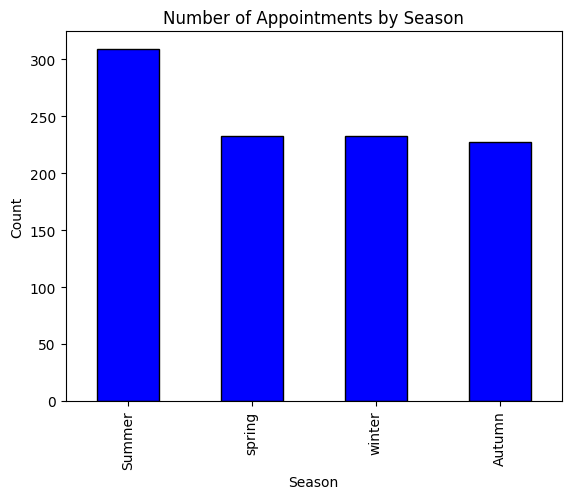

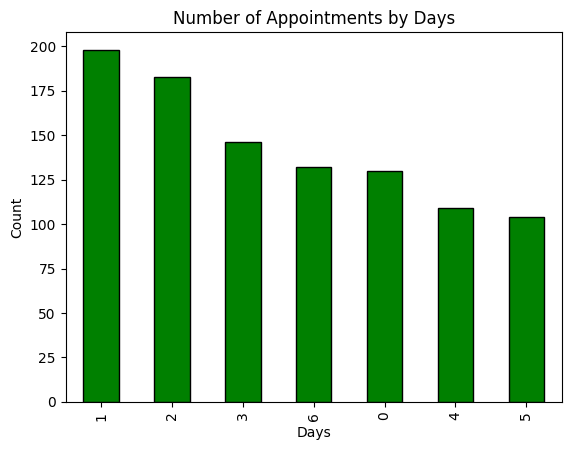

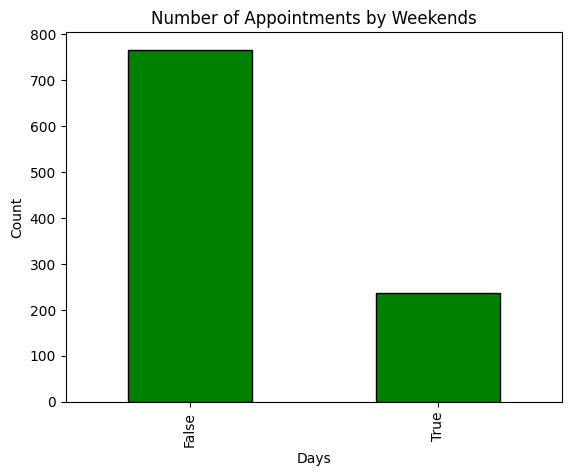

In [11]:
merge_data['season'].value_counts().plot(kind='bar', color='blue',edgecolor='black')
plt.title("Number of Appointments by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

merge_data['days_of_week'].value_counts().plot(kind='bar', color='green',edgecolor='black')
plt.title("Number of Appointments by Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

merge_data["is_weekend"].value_counts().plot(kind='bar', color='green',edgecolor='black')
plt.title("Number of Appointments by Weekends")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

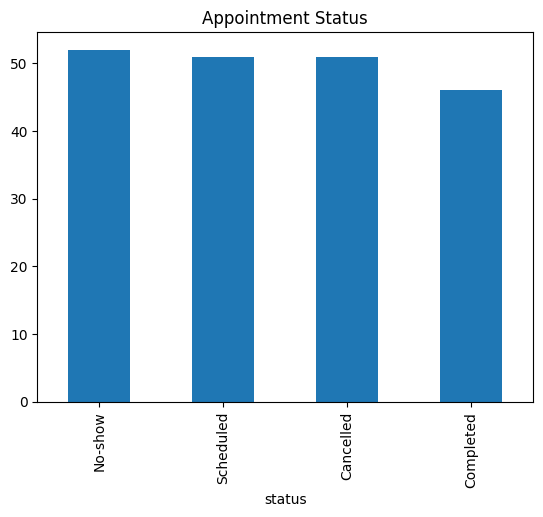

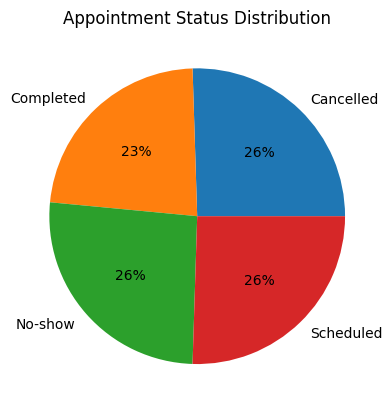

In [12]:
# Bar Chart: Count per status
appointments['status'].value_counts().plot(kind='bar', title='Appointment Status')
plt.show()

# Pie Chart: Percentage distribution
appointments.groupby('status').size().plot(kind='pie', autopct='%1.0f%%', title='Appointment Status Distribution')
plt.ylabel('')
plt.show()


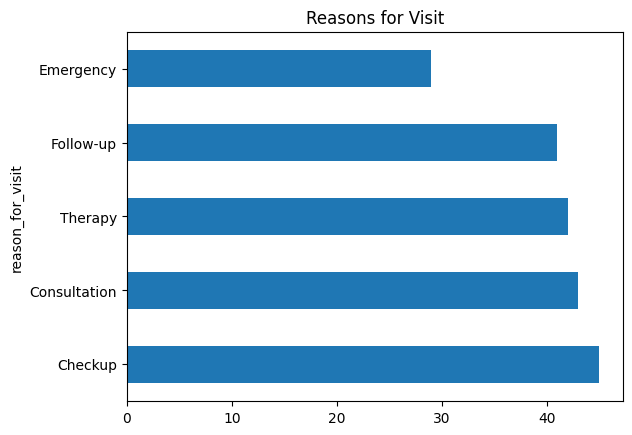

In [13]:
appointments['reason_for_visit'].value_counts().plot(kind='barh', title='Reasons for Visit')
plt.show()


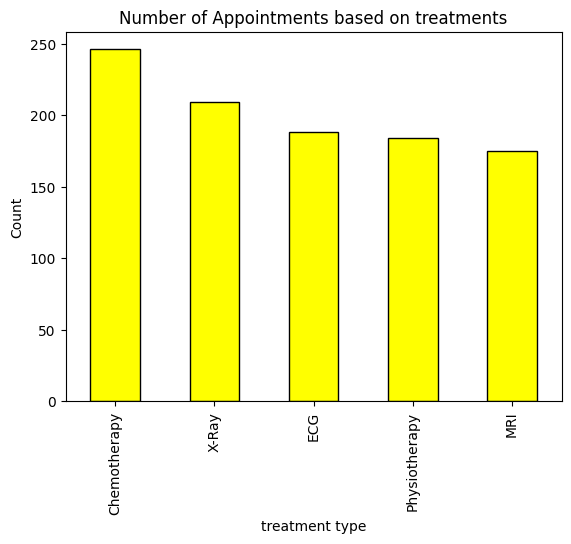

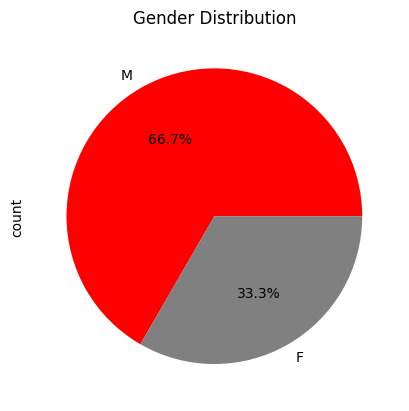

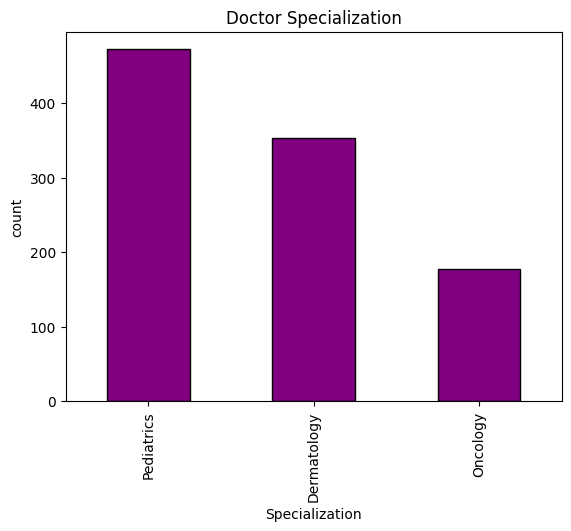

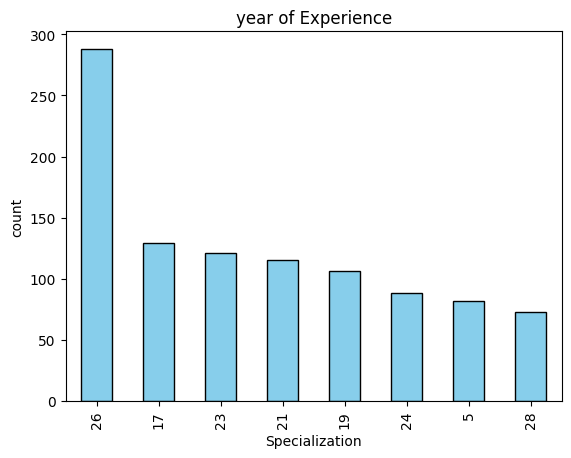

In [14]:
merge_data['treatment_type'].value_counts().plot(kind='bar', color='yellow', edgecolor= "black")
plt.title("Number of Appointments based on treatments")
plt.xlabel("treatment type")
plt.ylabel("Count")
plt.show()

merge_data['gender_x'].value_counts().plot(kind='pie',colors=['red','grey'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

merge_data['specialization'].value_counts().plot(kind='bar',color='purple',edgecolor='black')
plt.title('Doctor Specialization')
plt.xlabel('Specialization')
plt.ylabel('count')
plt.show()

merge_data['years_experience'].value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('year of Experience')
plt.xlabel('Specialization')
plt.ylabel('count')
plt.show()

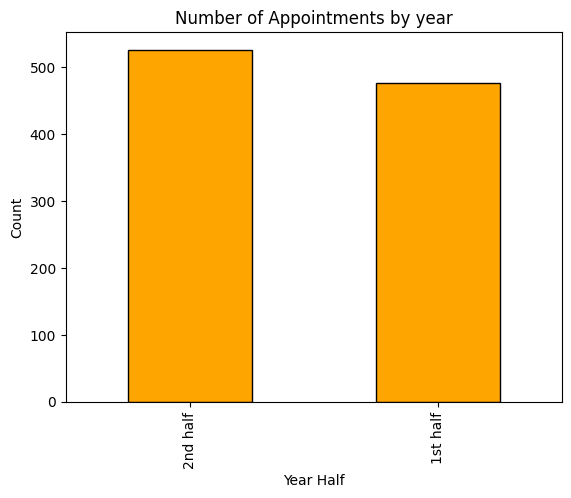

In [15]:
merge_data['year'].value_counts().plot(kind='bar', color='orange',edgecolor='black')
plt.title("Number of Appointments by year")
plt.xlabel("Year Half")
plt.ylabel("Count")
plt.show()

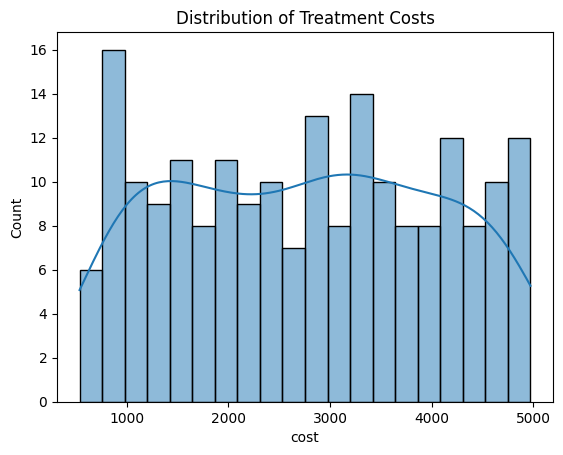

In [16]:
sns.histplot(treatments['cost'], bins=20, kde=True)
plt.title('Distribution of Treatment Costs')
plt.show()


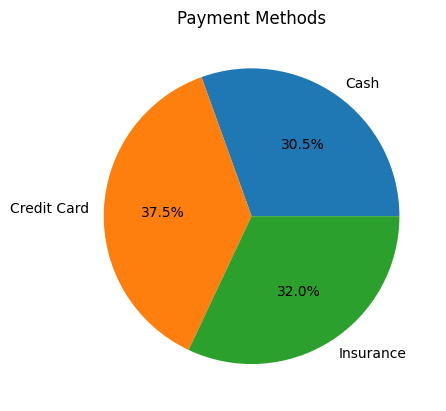

In [17]:
billing.groupby('payment_method').size().plot(kind='pie',    autopct='%1.1f%%',title='Payment Methods',)
plt.show()


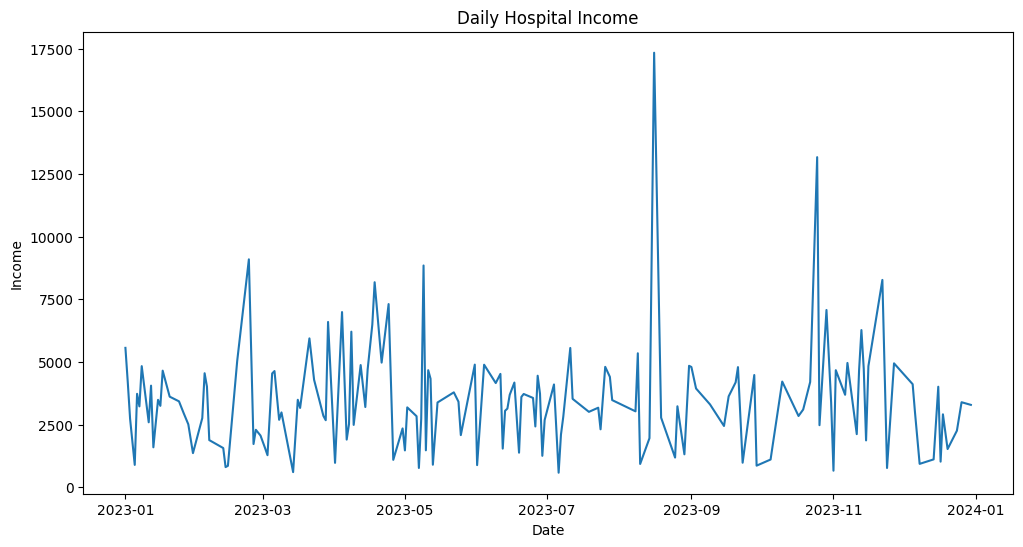

In [18]:
merged = appointments.merge(treatments, on='appointment_id').merge(billing, on='treatment_id')

daily_income = merged.groupby(merged['bill_date'].dt.date)['amount'].sum()
daily_income.plot(figsize=(12,6), title='Daily Hospital Income')
plt.xlabel('Date')
plt.ylabel('Income')
plt.show()


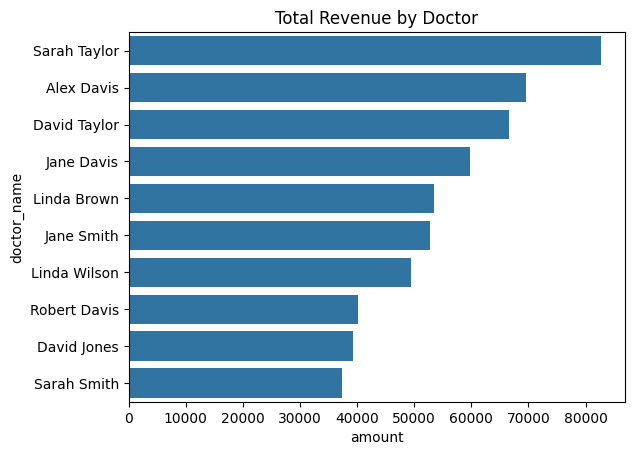

In [19]:
doctor_treatment = merged.groupby('doctor_id')['amount'].sum().reset_index()
doctor_treatment = doctor_treatment.merge(doctors[['doctor_id','first_name','last_name']], on='doctor_id')
doctor_treatment['doctor_name'] = doctor_treatment['first_name'] + ' ' + doctor_treatment['last_name']
doctor_treatment = doctor_treatment.sort_values(by='amount', ascending=False)

sns.barplot(data=doctor_treatment, x='amount', y='doctor_name')
plt.title('Total Revenue by Doctor')
plt.show()


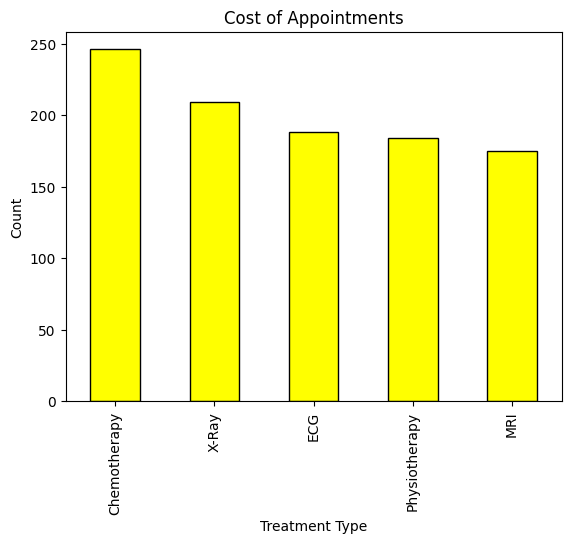

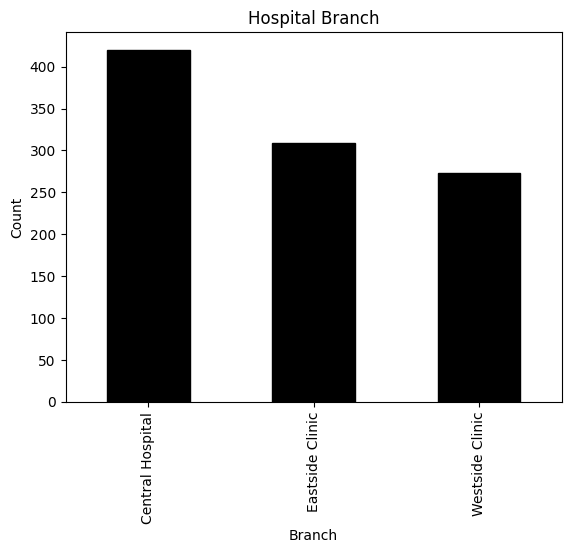

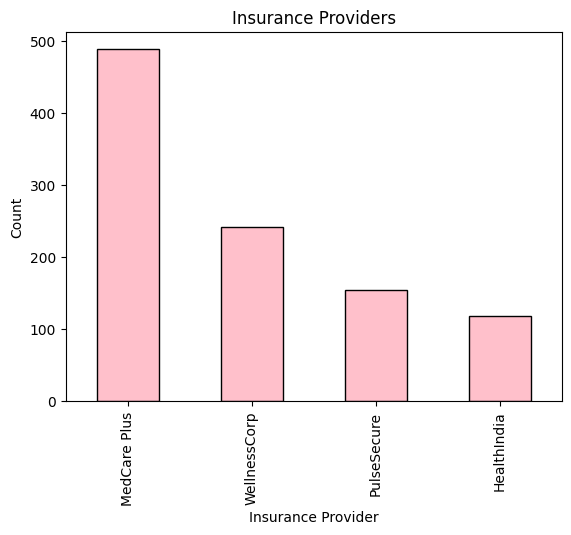

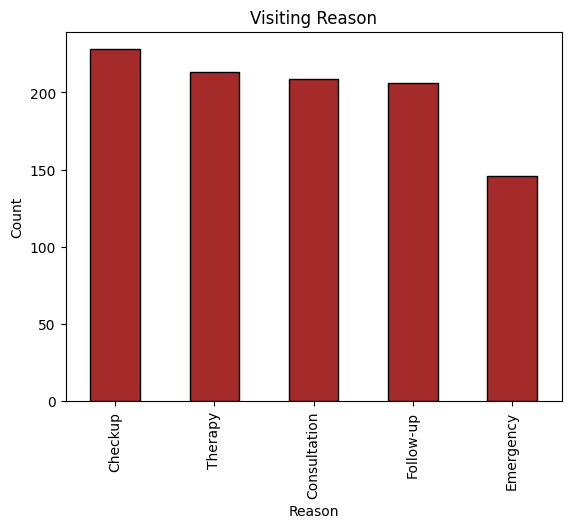

In [20]:
merge_data['treatment_type'].value_counts().plot(kind='bar', color='yellow',edgecolor='black')
plt.title("Cost of Appointments")
plt.xlabel("Treatment Type")
plt.ylabel("Count")
plt.show()

merge_data['hospital_branch'].value_counts().plot(kind='bar',color='black',edgecolor='black')
plt.title('Hospital Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()

merge_data['insurance_provider_x'].value_counts().plot(kind='bar',color='pink',edgecolor='black')
plt.title('Insurance Providers')
plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.show()

merge_data['reason_for_visit'].value_counts().plot(kind='bar',color='brown',edgecolor='black')
plt.title('Visiting Reason')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

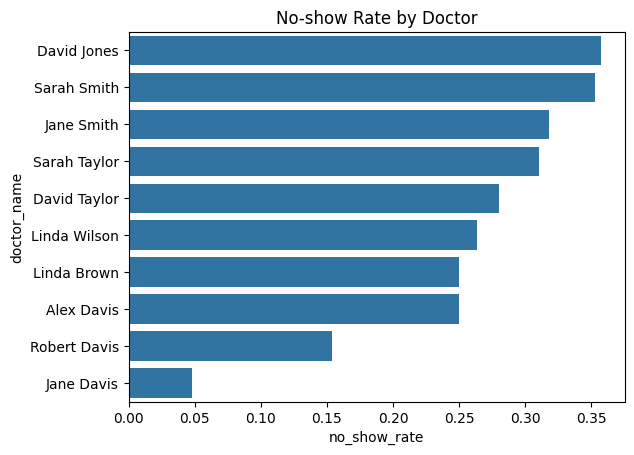

In [21]:
no_show_rate = appointments[appointments['status'] == 'No-show'].groupby('doctor_id').size().reset_index(name='no_shows')
total_appointments = appointments.groupby('doctor_id').size().reset_index(name='total')

no_show_data = no_show_rate.merge(total_appointments, on='doctor_id')
no_show_data['no_show_rate'] = no_show_data['no_shows'] / no_show_data['total']

no_show_data = no_show_data.merge(doctors[['doctor_id','first_name','last_name']], on='doctor_id')
no_show_data['doctor_name'] = no_show_data['first_name'] + ' ' + no_show_data['last_name']
no_show_data = no_show_data.sort_values(by='no_show_rate', ascending=False)

sns.barplot(data=no_show_data, x='no_show_rate', y='doctor_name')
plt.title('No-show Rate by Doctor')
plt.show()


# Predictions

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model

In [23]:

merge_data['status'] = merge_data['status'].str.strip().str.lower()

merge_data['no_show'] = merge_data['status'].apply(
    lambda x: 1 if x == 'completed' else 0
)

print(merge_data['no_show'].value_counts())

no_show
0    793
1    209
Name: count, dtype: int64


# RandomForestClassifiers

In [30]:
from sklearn.model_selection import train_test_split
features = ['days_of_week', 'is_weekend', 'month', 'years_experience', 
             'hour', 'quarter']
y = merge_data['no_show']
x = merge_data[features]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# More Detailed Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.86      0.86      0.86        42

    accuracy                           0.94       201
   macro avg       0.91      0.91      0.91       201
weighted avg       0.94      0.94      0.94       201

[[153   6]
 [  6  36]]


# Visualization

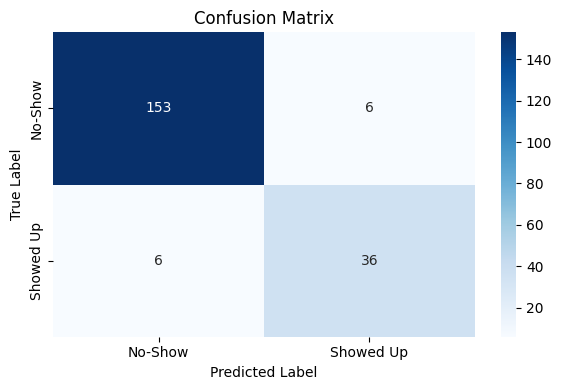

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No-Show', 'Showed Up'], yticklabels=['No-Show', 'Showed Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Healthcare No-Show Prediction Report

**Introduction**
This project analyzes healthcare appointment data to predict whether a patient will show up for their scheduled appointment using machine learning techniques.

**Abstract**
Missed appointments are costly for healthcare providers. By identifying key predictors such as day of the week, weekend status, and appointment cost, this analysis helps optimize scheduling and resource allocation.

**Tools Used**
- Python (Pandas, Scikit-learn, Seaborn, Matplotlib)
- Machine Learning Algorithms (Random Forest)
- Data Visualization techniques

**Steps Involved in Building the Project**
- **Data Collection:** Merged appointment, patient, doctor, billing, and treatment datasets
- **Data Preprocessing:** Cleaned null values, normalized status, encoded categorical features
- **Feature Engineering:** Extracted 'days_of_week', 'is_weekend', and treatment costs
- **Model Training:** Used Random Forest Classifier with train-test split and stratification
- **Evaluation:** Evaluated with accuracy, confusion matrix, and classification report
- **Visualization:** Visualized prediction performance using confusion matrix heatmap

**Conclusion**
The trained Random Forest model achieved high accuracy in predicting patient attendance. This solution aids in reducing missed appointments, improving clinic efficiency, and enhancing patient care.